# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refers to whether applicant is eligible to avail the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv 



In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [2]:
#Retrieving the dataset
url="https://raw.githubusercontent.com/dsrscientist/DSData/refs/heads/master/loan_prediction.csv"
df=pd.read_csv(url)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#EDA-Exploratory Data Analysis
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are three types of datatypes object, float 64 and int 64. 
There are null values present in few columns. 

In [6]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")
missing_val

,Null values
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


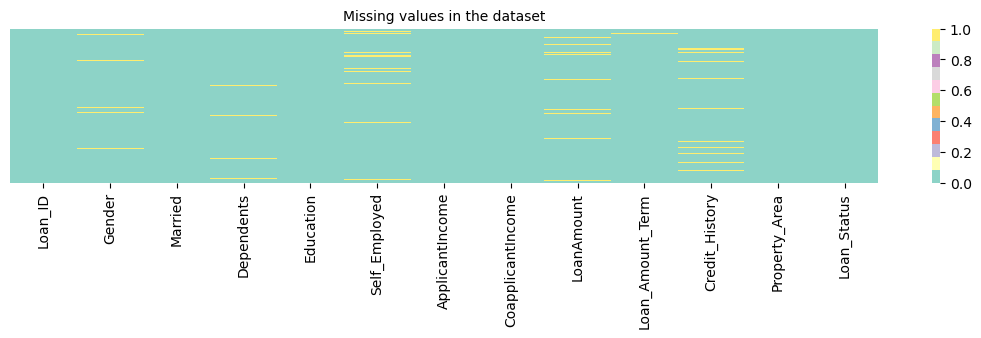

In [10]:
 #Let's visualize the missing values using heatmap 
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);


The columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan-Amount_Term, Credit_History present null values. The missing values will be treated in further sections.

In [11]:
#Feature Analysis
#Unique values
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

,No. of Unique values,type
Loan_ID,614,object
Gender,2,object
Married,2,object
Dependents,4,object
Education,2,object
Self_Employed,2,object
ApplicantIncome,505,int64
CoapplicantIncome,287,float64
LoanAmount,203,float64
Loan_Amount_Term,10,float64


About the number of unique values in the datasets:

Loan_ID column has the same unique values as the dataset rows, this column only serves to identify each record but doesn't influence the target variable. Therefore we can drop it.

The dataset contains the following categorical variables: Gender(2), Married(2), Dependents(4), Education(2), Self_Employed(2), Property_Area(3), Loan_Status(2) with its respective unique values.

The numerical and continuous columns in the dataset are: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

However, the Credit_History(2) and Loan_Amount_Term(10) columns, despite being numerical, should be analyzed as categorical during EDA.

In [12]:
# Dropping the column Loan_ID
df.drop(['Loan_ID'], axis=1, inplace=True)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
#Lets check the target value
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Our target variable has two unique values Y and N.

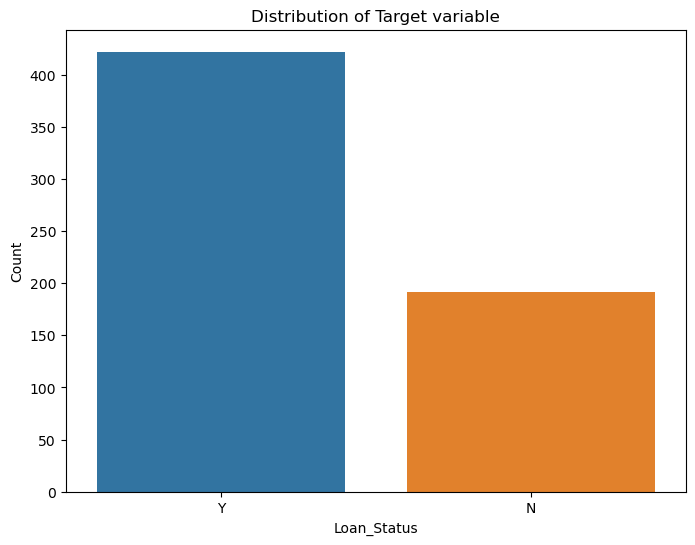

In [14]:
# Visualize the distribution of Loan_Status
col = 'Loan_Status'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=col)
plt.title('Distribution of Target variable')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

In [15]:
#Categorical Variables unique values
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numerical Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']



In [19]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col):
  print(f"\n{df[col].value_counts()}\n")


Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


Loan_Status
Y    422
N    192
Name: count, dtype: int64



In [20]:
#Checking Numerical Variables value counts

for i, col in enumerate(numerical_col):
  print(f"\n{df[col].value_counts()}\n")


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


Credit_History
1.0    475
0.0     89
Name: count, dtype: int64



In [21]:
#Summary of the dataset statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:

The summary of the dataset looks perfect since there are no negative/invalid values present.

In some columns The counts are not the same as the total of rows which means there are missing values in the dataset.

The mean value is larger than the median(50%) in columns ApplicantIncome, CoapplicantIncome, and LoanAmount which means the data could be skewed to the right in these columns.

The dataset could present outliers in the columns ApplicantIncome, CoapplicantIncome, and LoanAmount, however in the univariate analysis of each feature we will verify it.

The features are not on the same scale. Features should be on the same scale for algorithms such as logistic regression or SVM to converge smoothly.

In [22]:
# Lets have a look at the categorical columns
df.describe(exclude=[np.number])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [23]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 12)

The dataset has no duplicate values.

In [24]:
#Data Visualisation
#Univariate Analyis
# Distribution of Loan Status
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

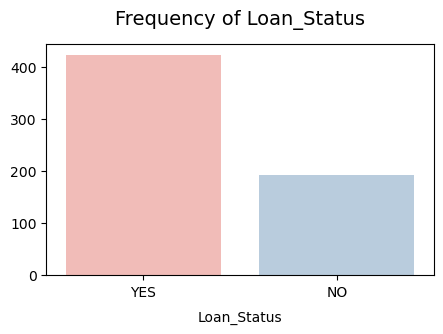

In [25]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Loan_Status
col = 'Loan_Status'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['YES', 'NO'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05);

We can observe that there 422 confirmed status and 192 declined status. So the dataset seems to be imbalanced. 

,count
Gender,
Male,489
Female,112


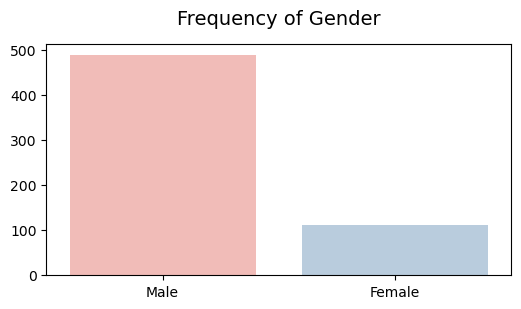

In [28]:
#Categorical Columns Visualisation
# Visualize the frequency of Gender
col = 'Gender'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
df[col].value_counts().to_frame()


,count
Married,
Yes,398
No,213


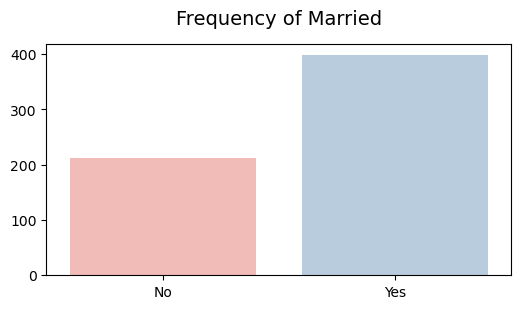

In [29]:
# Visualize the frequency of Married
col = 'Married'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()


,count
Dependents,
0,345
1,102
2,101
3+,51


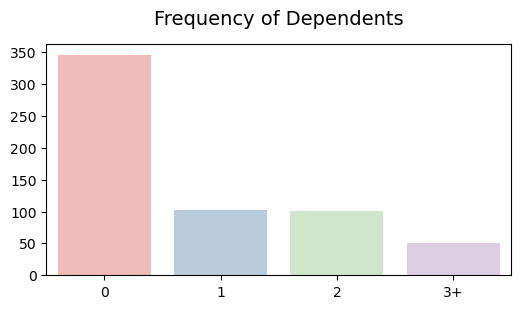

In [30]:
# Visualize the frequency of Dependents
col = 'Dependents'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

,count
Education,
Graduate,480
Not Graduate,134


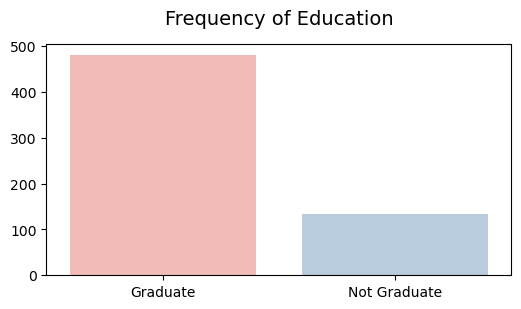

In [31]:
# Visualize the frequency of Education
col = 'Education'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

,count
Self_Employed,
No,500
Yes,82


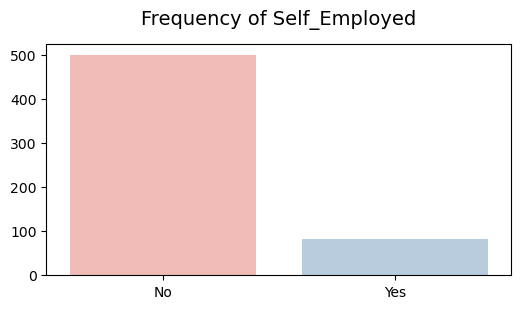

In [32]:
# Visualize the frequency of Self_Employed
col = 'Self_Employed'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

,No.
Property_Area,
Semiurban,233
Urban,202
Rural,179


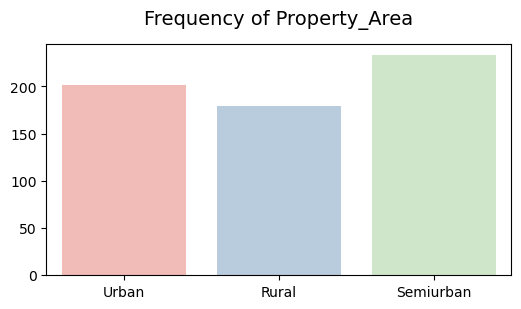

In [35]:
# Visualize the frequency of Property_Area
col = 'Property_Area'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame('No.')

,No.
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
NaN,14
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2


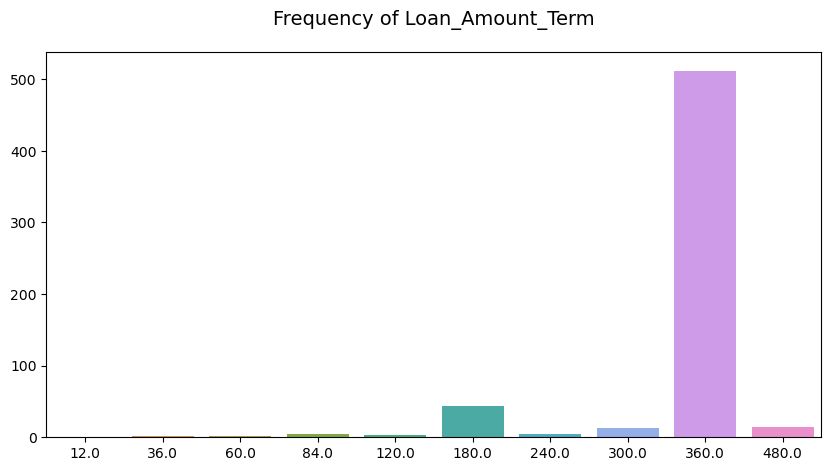

In [36]:
# Visualize the frequency of Loan_Amount_Term(1)
col = 'Loan_Amount_Term'
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts( dropna=False).to_frame('No.')


The majority of the group has 360 as loan amount term , followed by 180 as loan amount term. The others terms have a minimal representation.

,No.
Credit_History,
1.0,475
0.0,89
NaN,50


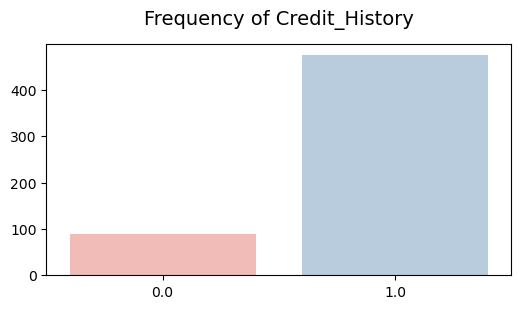

In [37]:
# Visualize the frequency of Credit_History(2)
col = 'Credit_History'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts(dropna=False).to_frame('No.')

We can observe that 475 people have credit history rest 89 dont have a proper credit history.

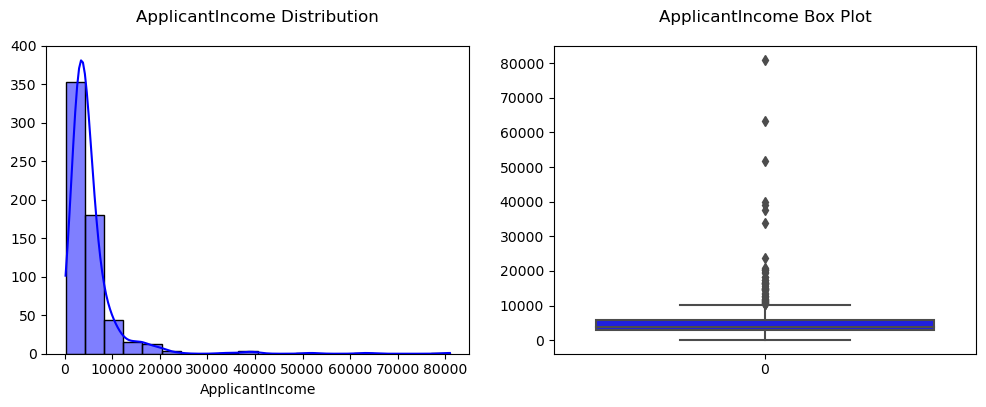

Skewness of ApplicantIncome : 6.539513113994625


In [38]:
#Numerical Columns Representation
# ApplicantIncome distribution
col = 'ApplicantIncome'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

We can observe outliers present and it is skewed towards right.

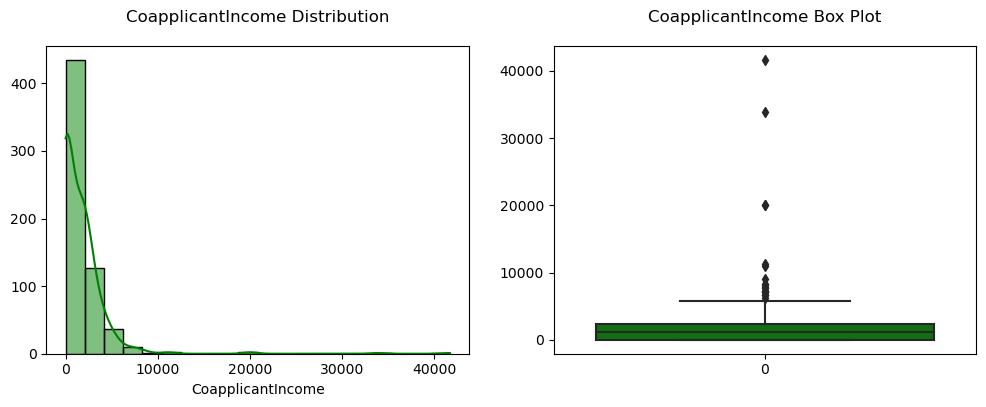

Skewness of CoapplicantIncome : 7.491531216657306


In [40]:
#Co Applicant Income Distribution
col = 'CoapplicantIncome'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='Green')
sns.boxplot(df[col], ax=axes[1], color='Green')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

There are outliers present and it is skewed to the right. 

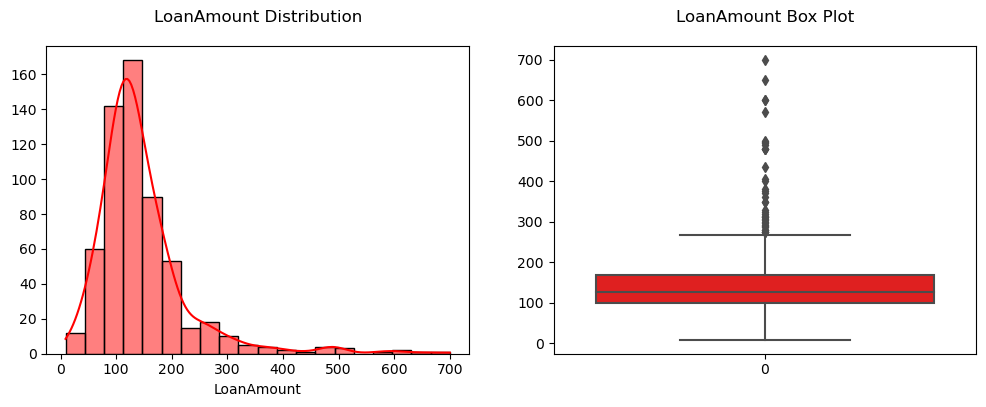

Skewness of LoanAmount : 2.677551679256059


In [41]:
#Loan Amount
col = 'LoanAmount'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='red')
sns.boxplot(df[col], ax=axes[1], color='red')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

We can observe outliers and right skewness.

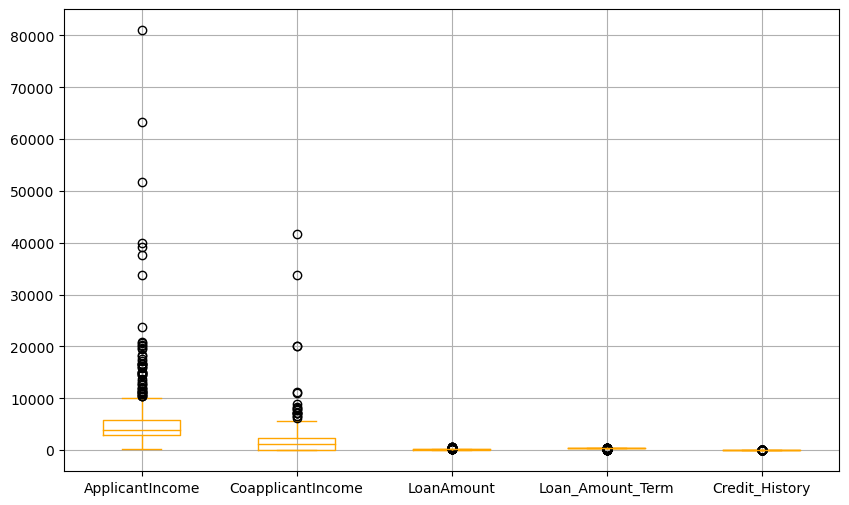

In [43]:
#Univariate Plot
# Boxplot for variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(10, 6))
df.boxplot(column=numerical_col, figsize=(10,10), color='Orange');

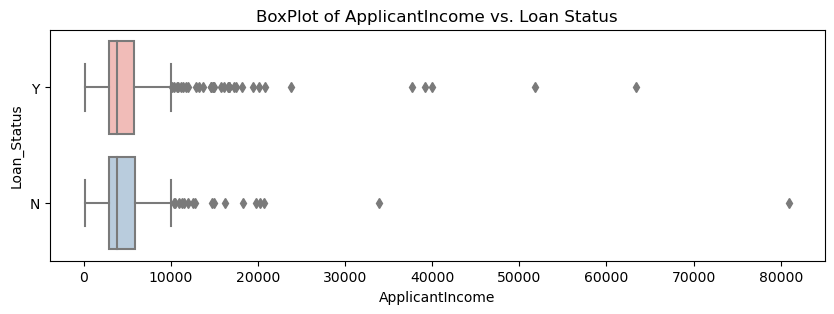

In [44]:
#Bivariate Analysis
#Lets find the loan status based on outliers
# Visualizing and comparing each independent variable with target
# ApplicantIncome 
col = 'ApplicantIncome'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Loan_Status']], x=col, y='Loan_Status')
plt.title(f"BoxPlot of {col} vs. Loan Status")
    
plt.show()

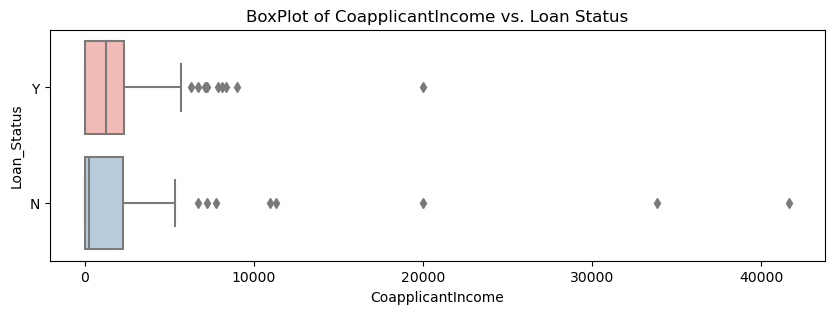

In [45]:
# CoapplicantIncome 
col = 'CoapplicantIncome'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Loan_Status']], x=col, y='Loan_Status')
plt.title(f"BoxPlot of {col} vs. Loan Status")
    
plt.show()

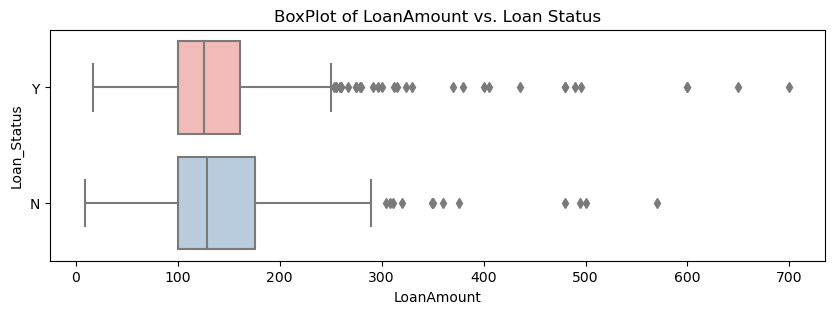

In [46]:
# LoanAmount 
col = 'LoanAmount'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Loan_Status']], x=col, y='Loan_Status')
plt.title(f"BoxPlot of {col} vs. Loan Status")
    
plt.show()

We can observe that almost the three column comparison had outliers present. In Loan Amount Vs Loan status we see that there is slight more of N status when compared to other two column comparisons. 

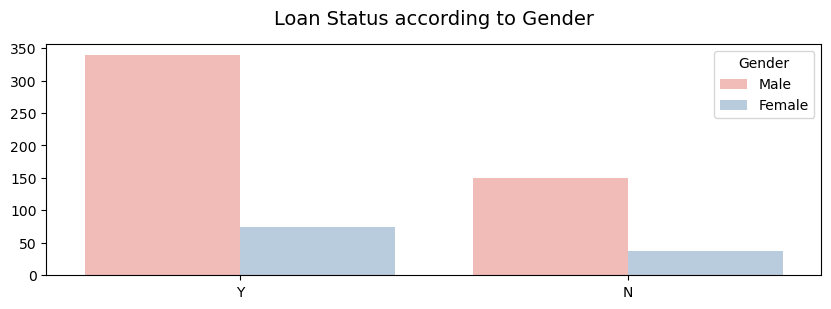

In [47]:
#Relationship between Target Variable and categorical columns

# Compare Gender vs Loan Status
col = 'Gender'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

We can observe that loan has been availed more to male than to females.

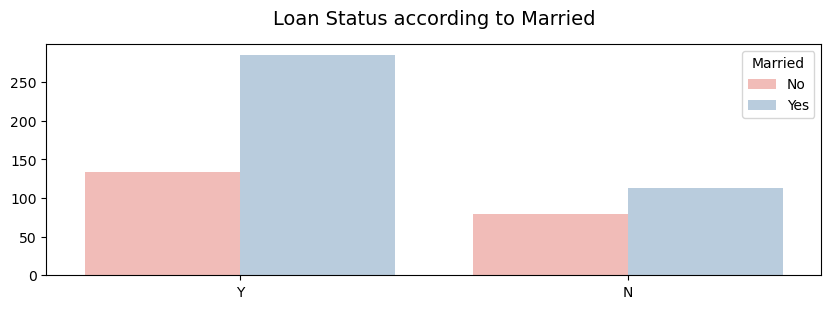

In [48]:
# Compare Married vs Loan Status
col = 'Married'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

We can observe that married persons have been offered loan when compared to unmarried. 

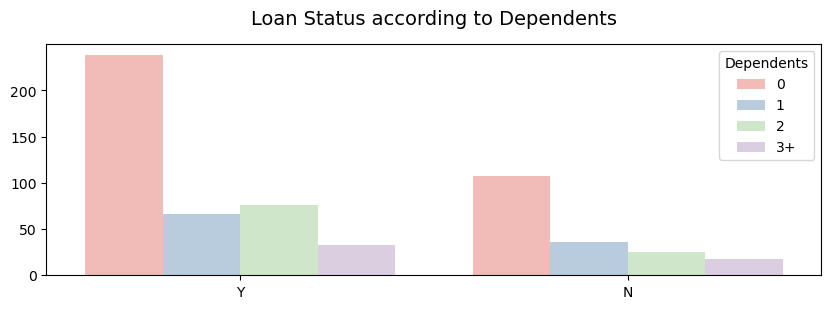

In [49]:
# Compare Dependents vs Loan Status
col = 'Dependents'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

We can majority of persons who were granted loan are having zero dependants when compared to other dependant status.

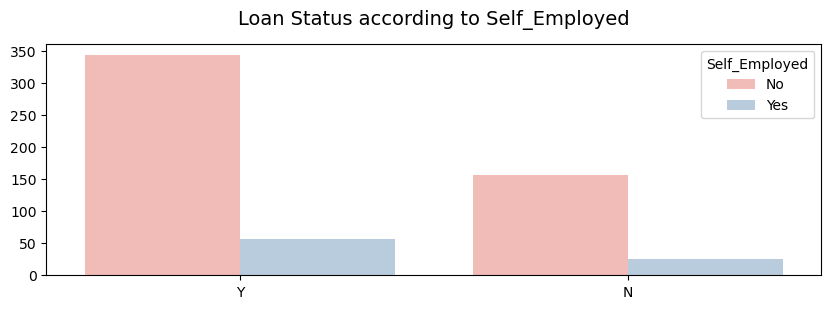

In [50]:
# Compare Self_Employed vs Loan Status
col = 'Self_Employed'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

We can observe that higher rate of self employeed individuals have been denied of loan when compared to other mode of employment.

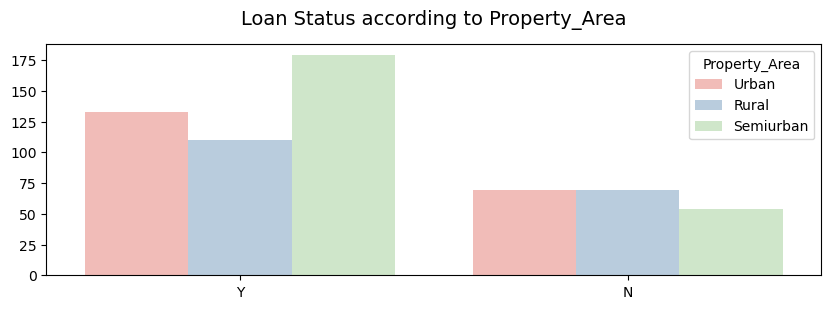

In [51]:
# Compare Property_Area vs Loan Status
col = 'Property_Area'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

There is a notable inclination that who live in semi-urban areas to received a loan, followed by urban areas.

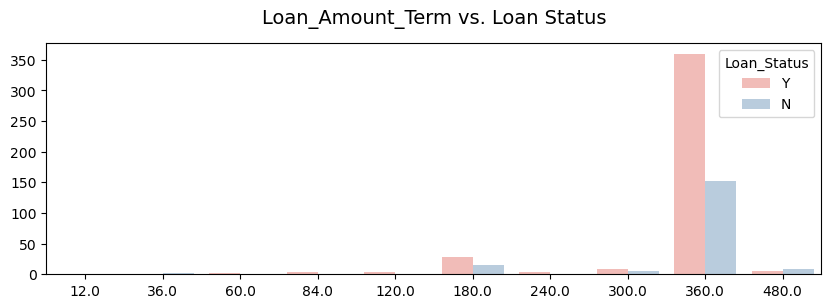

In [52]:
# Compare Loan_Amount_Term vs Loan Status
col = 'Loan_Amount_Term'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Loan_Status', data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)

plt.title(f"{col} vs. Loan Status", size=14, y=1.05);

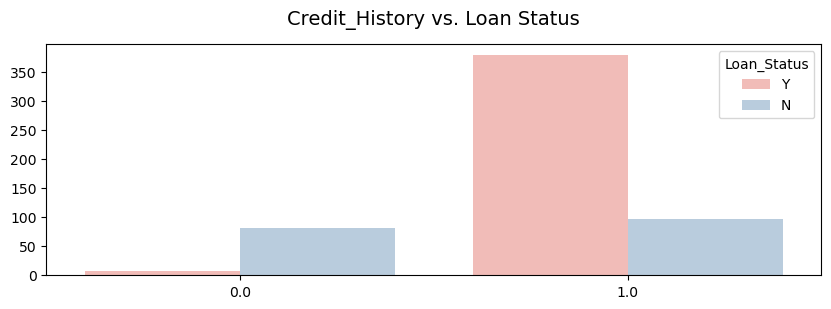

In [53]:
# Compare Credit_History vs Loan Status
col = 'Credit_History'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Loan_Status', data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)

plt.title(f"{col} vs. Loan Status", size=14, y=1.05);

We have seen the observation in the above value count and box plot sections.

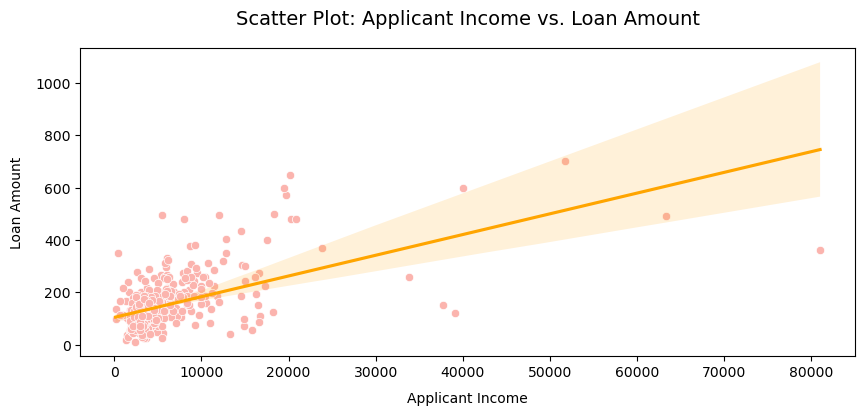

In [54]:
#Applicant income vs Loan Amount
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df, scatter=False, ax=ax, color='Orange')

plt.xlabel('Applicant Income', size=10, labelpad=8)
plt.ylabel('Loan Amount', size=10, labelpad=8)
plt.title('Scatter Plot: Applicant Income vs. Loan Amount', size=14, y=1.05);

Seems to be a linear relation between the applicant income and the loan amount.

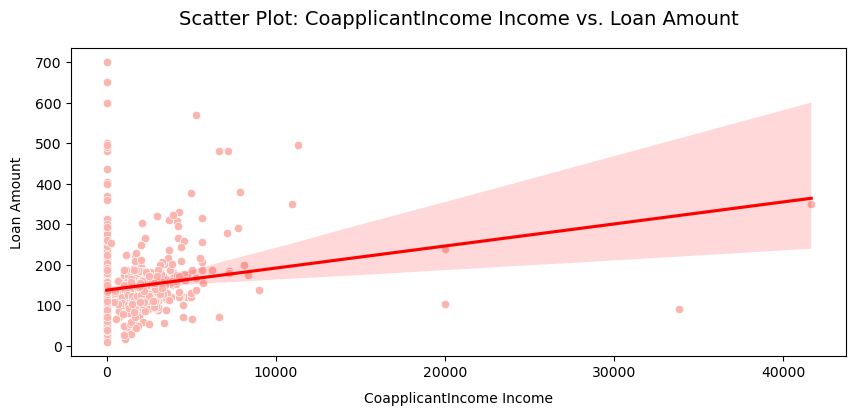

In [55]:
#Co Applicant Income Vs Loan Amount
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=df)
sns.regplot(x='CoapplicantIncome', y='LoanAmount', data=df, scatter=False, ax=ax, color='r')

plt.xlabel('CoapplicantIncome Income', size=10, labelpad=8)
plt.ylabel('Loan Amount', size=10, labelpad=8)
plt.title('Scatter Plot: CoapplicantIncome Income vs. Loan Amount', size=14, y=1.05);


Seems to be a linear relation between coapplicant income and loan amount.

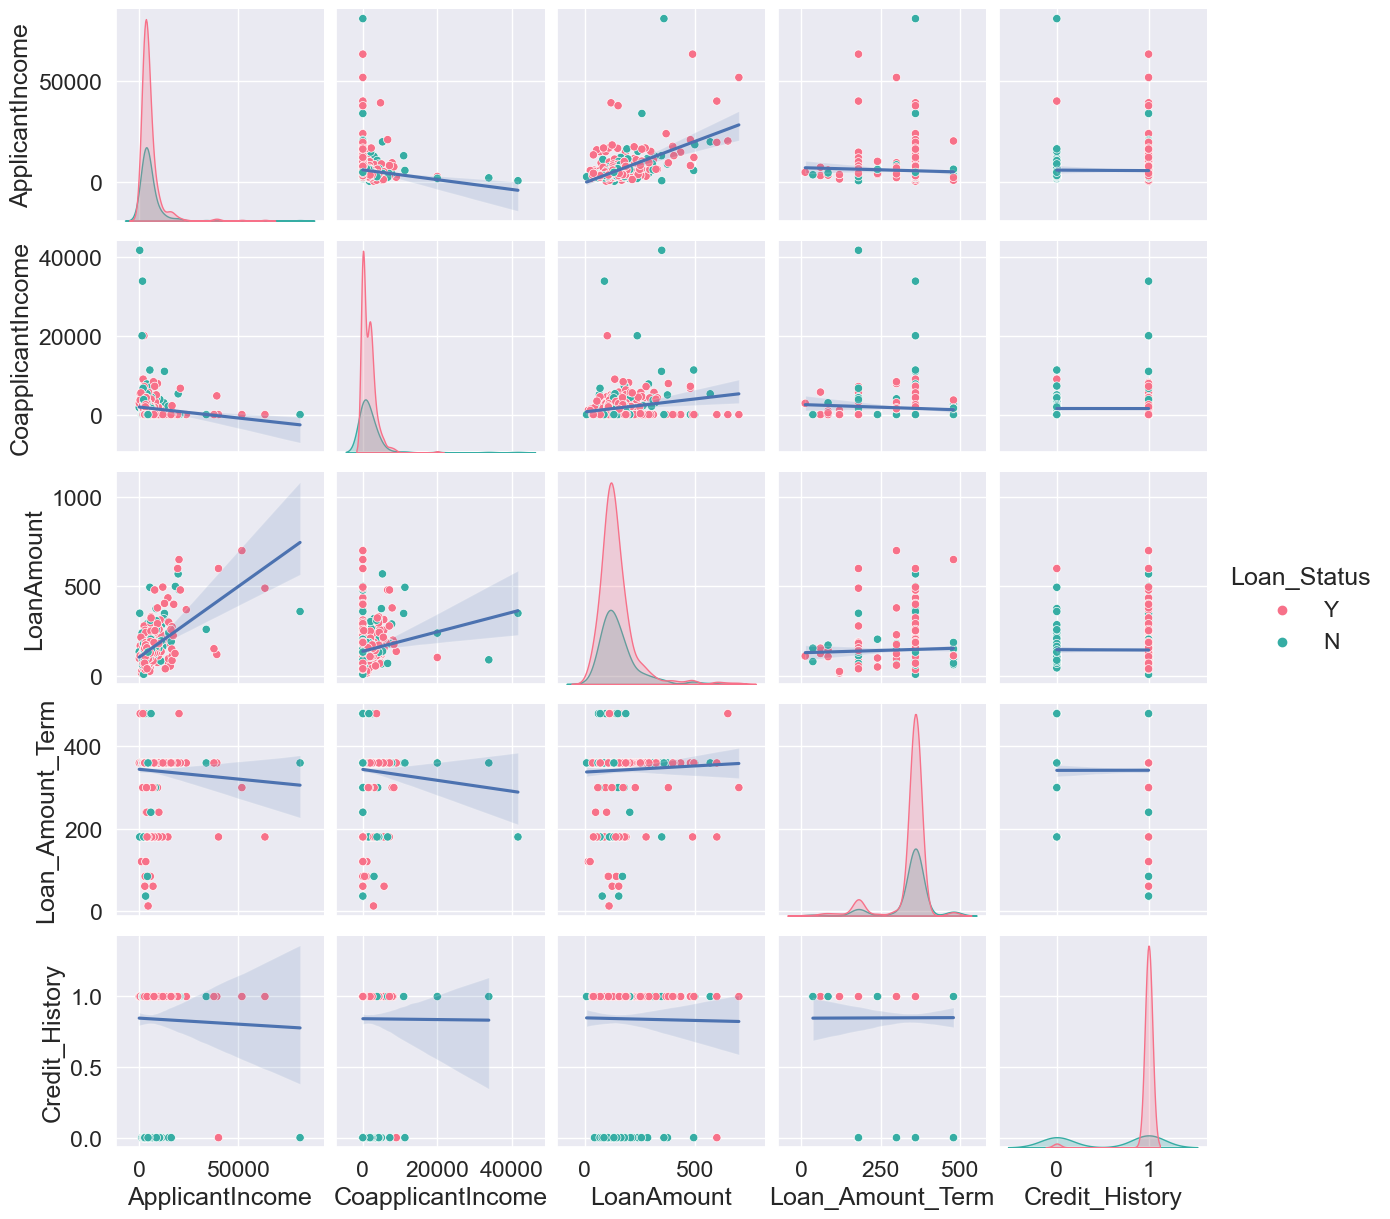

In [56]:
#Multivariate Analysis
#Pair Plot
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Loan_Status', palette = "husl")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive correlation between ApplicationIncome, CoapplicationIncome, and LoanAmount.

In [57]:
#Encoding the target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [73]:
cat_col=[]
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)


In [74]:
#Correlation between feature and variables
cor=df[num_col].corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


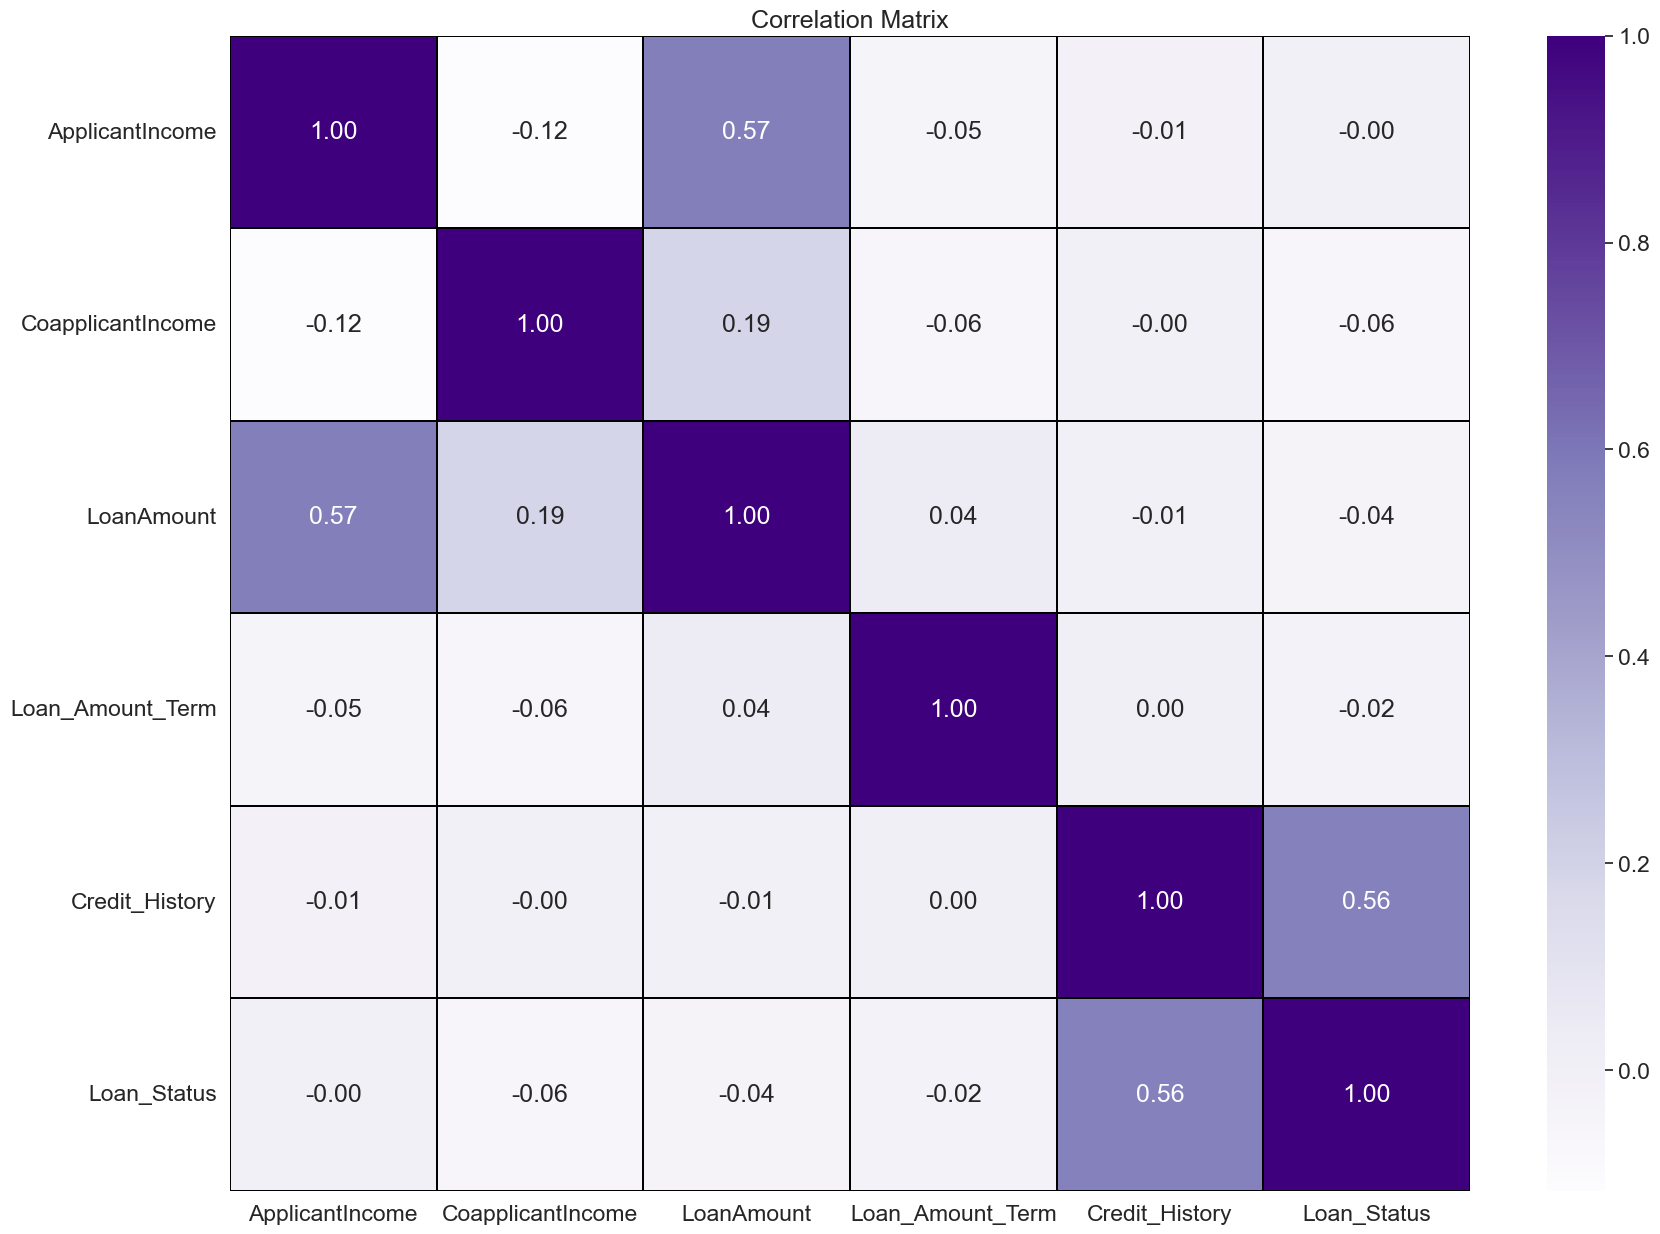

In [75]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Purples', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

This heatmap contains both positive and negative correlations.
The target is high correlated with Credit_History(+0.56)
The LoanAmount is correlated with ApplicationIncome(+0.57), and CoapplicantIncome(+0.19)

In [78]:
#Missing Values Analysis
missing_val=df.isnull().sum()
missing_val

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that married, gender and loan amount term are missing very less values, which can be dropped for better prediction.

In [91]:
#Dropping the Null value columns
col=['Gender','Married','Loan_Amount_Term']
df_new=df.dropna(subset=col)

In [94]:
df=df_new.copy()
df.isnull().sum()

Gender                0
Married               0
Dependents           11
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
#Imputing Values
Imp_col=['Dependents', 'Self_Employed', 'LoanAmount', 'Credit_History']
# listing the possible imputation values for LoanAmount column
col = 'LoanAmount'
print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=LoanAmount Mode=120.0 Median(50%)=128.000000  Mean=145.683837


In [96]:
for col in Imp_col:
    # Counting the number of null values in the column 
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

    if(col == 'LoanAmount'):
        # Get the median 
        impute_value = round(df[col].median(),1) 
        print(f"Impute the missing values in {col} with the median: {impute_value}")

        # Impute the missing values using the mode
        df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value
    else:
        # Get the mode 
        mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
        print(f"Impute the missing values with the mode {mode_value}")

        # Impute the missing values using the mode
        df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

    print(f"Missing values in {col}: {df[col].isnull().sum()}\n")


Missing values in Dependents: 11
Impute the missing values with the mode 0
Missing values in Dependents: 0

Missing values in Self_Employed: 31
Impute the missing values with the mode No
Missing values in Self_Employed: 0

Missing values in LoanAmount: 21
Impute the missing values in LoanAmount with the median: 128.0
Missing values in LoanAmount: 0

Missing values in Credit_History: 49
Impute the missing values with the mode 1.0
Missing values in Credit_History: 0



In [97]:
#Checking the missing value again
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
#Encoding Categorical Features
# Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Gender:
  ['Male' 'Female']

2.Married:
  ['No' 'Yes']

3.Dependents:
  ['0' '1' '2' '3+']

4.Education:
  ['Graduate' 'Not Graduate']

5.Self_Employed:
  ['No' 'Yes']

6.Property_Area:
  ['Urban' 'Rural' 'Semiurban']



The columns will be encodes manually as follows:

Gender: (1=Female, 2=Male)
Married : (1=No, 2=Yes)
Dependents : (0=0, 1=1, 2=2, 3=3+)
Education : (1=Graduate, 3=Not Graduate)
Self_Employed : (1=No, 2=Yes)

In [99]:
df_backup = df.copy()

In [100]:
# Encoding the features manually

df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})
df['Married'] = df['Married'].map({'Yes': 2, 'No': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 3})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 2, 'No': 1})

display(df.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,1,5849,0.0,128.0,360.0,1.0,Urban,1
1,2,2,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,2,2,0,1,2,3000,0.0,66.0,360.0,1.0,Urban,1
3,2,2,0,3,1,2583,2358.0,120.0,360.0,1.0,Urban,1
4,2,1,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,1


In [101]:
# One-Hot Encoding - column  Property_Area
df = pd.get_dummies(df, columns=['Property_Area'], prefix=['p_area'])

In [102]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
172,2,2,3,3,1,3522,0.0,81.0,180.0,1.0,0,True,False,False
326,2,1,0,1,1,4917,0.0,130.0,360.0,0.0,1,True,False,False
369,2,2,0,1,1,19730,5266.0,570.0,360.0,1.0,0,True,False,False
528,2,1,1,3,1,2679,1302.0,94.0,360.0,1.0,1,False,True,False
315,2,2,1,3,1,3399,1640.0,111.0,180.0,1.0,1,False,False,True


In [103]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-2]):
    print(f"{i+1}.{col}:\n {df[col].unique()}\n")

1.Gender:
 [2 1]

2.Married:
 [1 2]

3.Dependents:
 [0 1 2 3]

4.Education:
 [1 3]

5.Self_Employed:
 [1 2]



In [106]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int64
p_area_Rural            bool
p_area_Semiurban        bool
p_area_Urban            bool
dtype: object

In [124]:
# Squre root transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
df.Loan_Amount_Term = np .sqrt(df.Loan_Amount_Term)

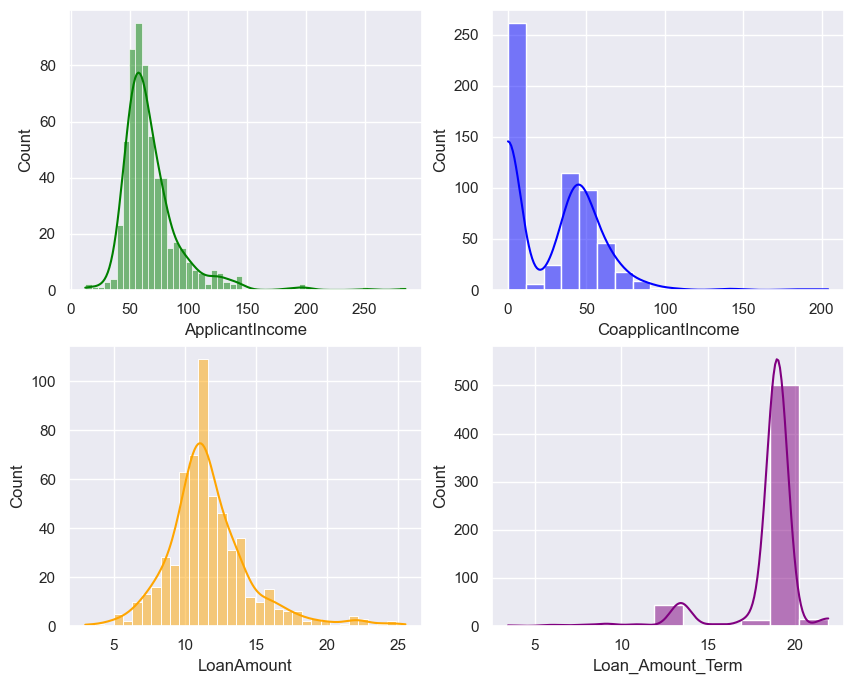

In [125]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='blue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

In [127]:
#Feature Scaling using Standard Scalarisation
# Separating the independent and target variables into x and y 
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (584, 13)
Label Dimension = (584,)


In [128]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.320182,-0.963711,-0.121112,0.282544,0.39841,-0.643462,-0.783109,1.434431
1,0.476331,0.735457,0.247232,-0.527162,-0.386790,-0.018948,0.372463,-0.121112,0.282544,0.39841,1.554093,-0.783109,-0.697141
2,0.476331,0.735457,-0.748516,-0.527162,2.585384,-0.518152,-0.963711,-1.196789,0.282544,0.39841,-0.643462,-0.783109,1.434431
3,0.476331,0.735457,-0.748516,1.896952,-0.386790,-0.670669,0.707126,-0.242267,0.282544,0.39841,-0.643462,-0.783109,1.434431
4,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.358066,-0.963711,0.067955,0.282544,0.39841,-0.643462,-0.783109,1.434431


In [129]:
#Muticollinearity Analysis and Feature Selection
# Checking Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
10,p_area_Rural,inf
11,p_area_Semiurban,inf
12,p_area_Urban,inf
5,ApplicantIncome,1.935879
7,LoanAmount,1.855797
6,CoapplicantIncome,1.427531
1,Married,1.336832
0,Gender,1.206553
2,Dependents,1.173940
3,Education,1.068652


We can observe the VIF values are not greater than 10, so we dont have multicolinearity Issue in the dataset.

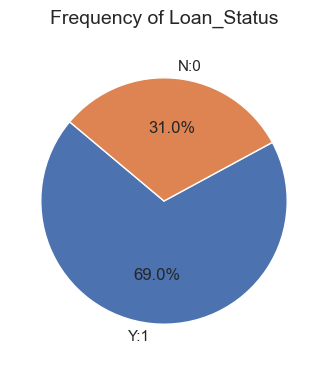

In [132]:
#Balancing the dataset.
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['Y:1', 'N:0'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Loan_Status", size=14, y=1.05)
plt.show()

In [133]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

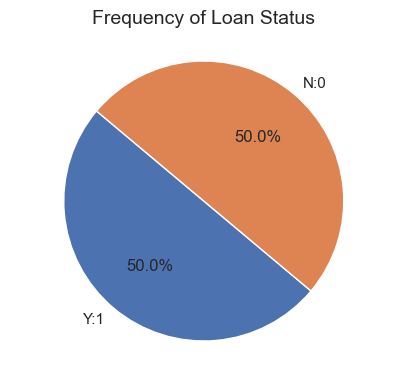

In [134]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['Y:1', 'N:0'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Loan Status", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [135]:
X=x1
Y=y1

In [136]:
#Modeling
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [137]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.8719 at random_state 60
CPU times: user 11.8 s, sys: 38.8 ms, total: 11.8 s
Wall time: 11.9 s


In [138]:
#Creating Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (564, 13)
x_test shape:   (242, 13)
y_train shape:  (564,)
y_test shape:   (242,)


In [139]:
#Classification Algorithm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [140]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [152]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}



In [164]:
%%time
id_model = 'RandomForestClassifier'
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(RFC,X,Y,cv=5).mean())


Model: RandomForestClassifier
Confusion matrix: 
 [[ 95  26]
 [  9 112]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       121
           1       0.81      0.93      0.86       121

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.85       242
weighted avg       0.86      0.86      0.85       242

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 85.54%
Cross_Validaton_Score 0.8015642972164712
CPU times: user 464 ms, sys: 4.82 ms, total: 469 ms
Wall time: 468 ms


In [185]:
%%time
id_model = 'ExtraTreesClassifier'
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(ETC,X,Y,cv=5).mean())


Model: ExtraTreesClassifier
Confusion matrix: 
 [[ 97  24]
 [ 13 108]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       121
           1       0.82      0.89      0.85       121

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 84.71%
Cross_Validaton_Score 0.8214170692431562
CPU times: user 372 ms, sys: 5.04 ms, total: 377 ms
Wall time: 376 ms


In [145]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)


Model: LogisticRegression
Confusion matrix: 
 [[ 65  56]
 [ 17 104]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.54      0.64       121
           1       0.65      0.86      0.74       121

    accuracy                           0.70       242
   macro avg       0.72      0.70      0.69       242
weighted avg       0.72      0.70      0.69       242

Training Accuracy using LogisticRegression is 71.10%
The accuracy score using LogisticRegression is 69.83%
CPU times: user 16.3 ms, sys: 3.66 ms, total: 20 ms
Wall time: 19.7 ms


In [184]:
%%time

id_model = 'SVC'
SVC=SVC()
SVC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)


print("Cross_Validaton_Score",cross_val_score(SVC,X,Y,cv=5).mean())


Model: SVC
Confusion matrix: 
 [[ 77  44]
 [ 13 108]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.64      0.73       121
           1       0.71      0.89      0.79       121

    accuracy                           0.76       242
   macro avg       0.78      0.76      0.76       242
weighted avg       0.78      0.76      0.76       242

Training Accuracy using SVC is 78.01%
The accuracy score using SVC is 76.45%
Cross_Validaton_Score 0.7121463077984818
CPU times: user 99.8 ms, sys: 3.27 ms, total: 103 ms
Wall time: 102 ms


In [186]:
%%time

id_model = 'GradientBoostingClassifier'
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)


print("Cross_Validaton_Score",cross_val_score(GBC,X,Y,cv=5).mean())


Model: GradientBoostingClassifier
Confusion matrix: 
 [[ 91  30]
 [ 11 110]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       121
           1       0.79      0.91      0.84       121

    accuracy                           0.83       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242

Training Accuracy using GradientBoostingClassifier is 90.60%
The accuracy score using GradientBoostingClassifier is 83.06%
Cross_Validaton_Score 0.76935050993022
CPU times: user 429 ms, sys: 3.42 ms, total: 432 ms
Wall time: 431 ms


In [188]:
%%time

id_model = 'AdaBoostClassifier'
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(ABC,X,Y,cv=5).mean())


Model: AdaBoostClassifier
Confusion matrix: 
 [[ 85  36]
 [ 16 105]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.70      0.77       121
           1       0.74      0.87      0.80       121

    accuracy                           0.79       242
   macro avg       0.79      0.79      0.78       242
weighted avg       0.79      0.79      0.78       242

Training Accuracy using AdaBoostClassifier is 82.80%
The accuracy score using AdaBoostClassifier is 78.51%
Cross_Validaton_Score 0.7320910973084886
CPU times: user 236 ms, sys: 3.42 ms, total: 239 ms
Wall time: 238 ms


In [187]:
%%time

id_model = 'BaggingClassifier'
BC=BaggingClassifier()
BC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)


print("Cross_Validaton_Score",cross_val_score(BC,X,Y,cv=5).mean())


Model: BaggingClassifier
Confusion matrix: 
 [[ 92  29]
 [ 20 101]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       121
           1       0.78      0.83      0.80       121

    accuracy                           0.80       242
   macro avg       0.80      0.80      0.80       242
weighted avg       0.80      0.80      0.80       242

Training Accuracy using BaggingClassifier is 98.23%
The accuracy score using BaggingClassifier is 79.75%
Cross_Validaton_Score 0.7556015642972165
CPU times: user 128 ms, sys: 3.25 ms, total: 131 ms
Wall time: 129 ms


The model with best accuracy is Random Forest Classifier with 85% and CV mean of .08.
I go ahead with Random Forest Classifier as my model.

In [165]:
#Hyperparameter Tuning
random_state

60

In [ ]:
model =RandomForestClassifier()
model.get_params()

In [167]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [50, 155, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = RandomForestClassifier()

In [168]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

CPU times: user 913 ms, sys: 210 ms, total: 1.12 s
Wall time: 36.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [50, 155, 1000]})

In [169]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for Random Forest Classifier model:")
best_params

Best Parameters for Random Forest Classifier model:


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [170]:
best_model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       n_estimators=300, n_jobs=-2, random_state=1000)

In [171]:
#Final Model
# Create the model with the best parameters
best_model = RandomForestClassifier (criterion = 'entropy', 
                                   max_depth = 20, 
                                   n_estimators = 100, 
                                   n_jobs = -2, 
                                   random_state = 1000)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 84.3%


The Accuracy of the model is 84%

In [172]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

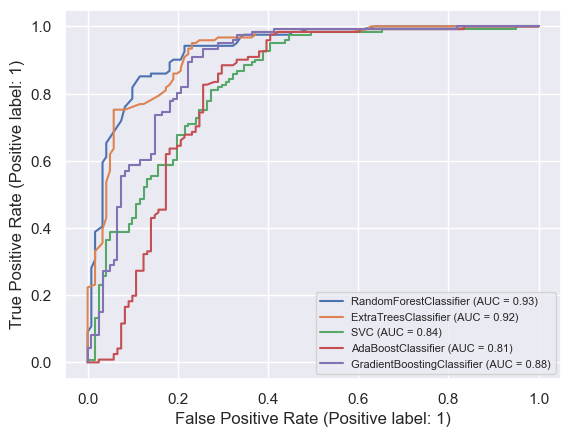

In [189]:
#Plotting ROC and AUC for the models 
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

metrics.RocCurveDisplay.from_estimator(RFC,x_test,y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(ETC, x_test, y_test,ax=ax)    
metrics.RocCurveDisplay.from_estimator(SVC, x_test, y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(ABC, x_test, y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(GBC, x_test, y_test,ax=ax)


plt.legend(prop={'size':8}, loc='lower right')
plt.show()

In [190]:
#Saving the Model

import joblib
joblib.dump(best_model, "Loan_Application_model.pkl")

['Loan_Application_model.pkl']

In [191]:
# Lets load the saved model and get the predictions
model = joblib.load("Loan_Application_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 84.298 %


,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
Predicted,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
Original,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0


These are the predicted values of the dataset. 
By this we finish up the project analysis with the best model as Random Forest Classifier.
